**Block #1: Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 

In [2]:
files.upload()

Saving messed_up_iris.xlsx to messed_up_iris (2).xlsx


{'messed_up_iris.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00B;>\xc9\\\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

**Block #2: Loading the data and with no extra index columns**

In [3]:
filename='messed_up_iris.xlsx'
data= pd.read_excel(filename,index_col=0)
print(data.head())
print(data.shape)


   sepal_length  sepal_width  petal_length  petal_width species   color  origin
0           5.1          3.5           1.4          0.2  setosa   green     usa
1           4.9          3.0           1.4          0.2  setosa  yellow     usa
2           4.7          3.2           1.3          0.2  setosa   green     usa
3           4.6          3.1           1.5          0.2  setosa  orange   japan
4           5.0          3.6           1.4          0.2  setosa    blue  europe
(150, 7)


**Block #3:Removing columns and rows where there are more than 50% of the data missing**

In [4]:
cols = data.columns[data.isnull().mean()>0.5]
data1=data.drop(cols, axis=1)
data=data1.dropna(axis = 0,thresh=4)
print(data.head())
print(data.shape)

   sepal_length  sepal_width  petal_length  petal_width species  origin
0           5.1          3.5           1.4          0.2  setosa     usa
1           4.9          3.0           1.4          0.2  setosa     usa
2           4.7          3.2           1.3          0.2  setosa     usa
3           4.6          3.1           1.5          0.2  setosa   japan
4           5.0          3.6           1.4          0.2  setosa  europe
(145, 6)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


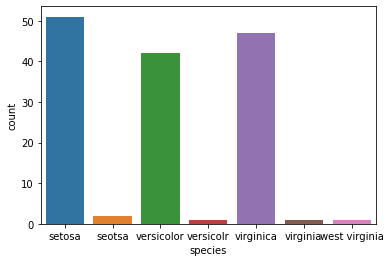

In [5]:
sns.countplot(data['species'])

In [12]:
data['origin'] = np.where(data['origin']=='uas','usa',data['origin'])
data['origin'] = np.where(data['origin']=='euarope','europe',data['origin'])
data['species'] = np.where(data['species']=='seotsa','setosa',data['species'])
data['species'] = np.where(data['species']=='versicolr','versicolor',data['species'])
data['species'] = np.where(data['species']=='west virginia','virginica',data['species'])
data['species'] = np.where(data['species']=='virginia','virginica',data['species'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


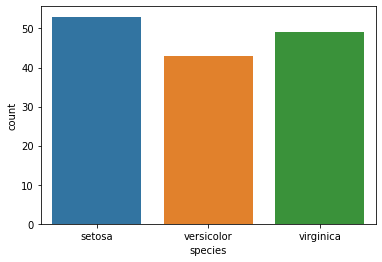

In [13]:
sns.countplot(data['species']),drop_first=True)

**Dummy coding the categorical data(with no range or cuts)**

In [14]:
pd.get_dummies(data,columns=['sepal_length','sepal_width','petal_length','petal_width', 'species','origin']).head()

,sepal_length_4.3,sepal_length_4.4,sepal_length_4.5,sepal_length_4.6,sepal_length_4.7,sepal_length_4.8,sepal_length_4.9,sepal_length_5.0,sepal_length_5.1,sepal_length_5.2,sepal_length_5.3,sepal_length_5.4,sepal_length_5.5,sepal_length_5.6,sepal_length_5.7,sepal_length_5.8,sepal_length_5.9,sepal_length_6.0,sepal_length_6.1,sepal_length_6.2,sepal_length_6.3,sepal_length_6.4,sepal_length_6.5,sepal_length_6.6,sepal_length_6.7,sepal_length_6.8,sepal_length_6.9,sepal_length_7.0,sepal_length_7.1,sepal_length_7.2,sepal_length_7.3,sepal_length_7.4,sepal_length_7.6,sepal_length_7.7,sepal_length_7.9,sepal_length_51.0,sepal_length_55.0,sepal_length_69.0,sepal_length_77.0,sepal_width_2.0,...,petal_length_5.9,petal_length_6.0,petal_length_6.1,petal_length_6.3,petal_length_6.4,petal_length_6.7,petal_length_6.9,petal_length_51.0,petal_length_66.0,petal_length_67.0,petal_width_0.1,petal_width_0.2,petal_width_0.3,petal_width_0.4,petal_width_0.5,petal_width_0.6,petal_width_1.0,petal_width_1.1,petal_width_1.2,petal_width_1.3,petal_width_1.4,petal_width_1.5,petal_width_1.6,petal_width_1.8,petal_width_1.9,petal_width_2.0,petal_width_2.1,petal_width_2.2,petal_width_2.3,petal_width_2.4,petal_width_2.5,petal_width_19.0,petal_width_24.0,petal_width_30.0,species_setosa,species_versicolor,species_virginica,origin_europe,origin_japan,origin_usa
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


**Dropping the redundant columns from the dataframe so that I'm left with just the dummy coded columns**

In [15]:
pd.get_dummies(data,columns=['sepal_length','sepal_width','petal_length','petal_width', 'species','origin'],drop_first=True).head()

,sepal_length_4.4,sepal_length_4.5,sepal_length_4.6,sepal_length_4.7,sepal_length_4.8,sepal_length_4.9,sepal_length_5.0,sepal_length_5.1,sepal_length_5.2,sepal_length_5.3,sepal_length_5.4,sepal_length_5.5,sepal_length_5.6,sepal_length_5.7,sepal_length_5.8,sepal_length_5.9,sepal_length_6.0,sepal_length_6.1,sepal_length_6.2,sepal_length_6.3,sepal_length_6.4,sepal_length_6.5,sepal_length_6.6,sepal_length_6.7,sepal_length_6.8,sepal_length_6.9,sepal_length_7.0,sepal_length_7.1,sepal_length_7.2,sepal_length_7.3,sepal_length_7.4,sepal_length_7.6,sepal_length_7.7,sepal_length_7.9,sepal_length_51.0,sepal_length_55.0,sepal_length_69.0,sepal_length_77.0,sepal_width_2.2,sepal_width_2.3,...,petal_length_5.6,petal_length_5.7,petal_length_5.8,petal_length_5.9,petal_length_6.0,petal_length_6.1,petal_length_6.3,petal_length_6.4,petal_length_6.7,petal_length_6.9,petal_length_51.0,petal_length_66.0,petal_length_67.0,petal_width_0.2,petal_width_0.3,petal_width_0.4,petal_width_0.5,petal_width_0.6,petal_width_1.0,petal_width_1.1,petal_width_1.2,petal_width_1.3,petal_width_1.4,petal_width_1.5,petal_width_1.6,petal_width_1.8,petal_width_1.9,petal_width_2.0,petal_width_2.1,petal_width_2.2,petal_width_2.3,petal_width_2.4,petal_width_2.5,petal_width_19.0,petal_width_24.0,petal_width_30.0,species_versicolor,species_virginica,origin_japan,origin_usa
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Block 8: Replace remaining missing data with the median value and also cut data to simplfy .**

In [50]:
origin_df = pd.get_dummies(data['origin'],drop_first=True)
species_df = pd.get_dummies(data['species'],drop_first=True)
s_1=pd.qcut(data['sepal_length'],3)
s_1.value_counts()

s_w = pd.qcut(data['sepal_width'],3)
s_w.values
p_l = pd.qcut(data['petal_length'],3)
p_l.value_counts
p_w= pd.qcut(data['petal_width'],3) 
p_w.value_counts

s_df = pd.get_dummies(s_l,drop_first=True)
sw_df = pd.get_dummies(s_w,drop_first=True)
p_df = pd.get_dummies(p_l,drop_first=True)
pw_df = pd.get_dummies(p_w,drop_first=True)

data2 = data.fillna(data.median())

final_data = pd.concat([data2,s_df,sw_df,p_df,pw_df,origin_df,species_df],axis=1)
final_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,origin,"(0.9, 1.8]","(1.8, 2.7]","(2.7, 77.0]","(2.9, 3.2]","(3.2, 36.0]","(1.7, 4.9]","(4.9, 67.0]","(0.433, 1.6]","(1.6, 30.0]",japan,usa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,usa,0,0,1,0,1,0,0,0,0,0,1,0,0
1,4.9,3.0,1.4,0.2,setosa,usa,0,0,1,1,0,0,0,0,0,0,1,0,0
2,4.7,3.2,1.3,0.2,setosa,usa,0,0,1,1,0,0,0,0,0,0,1,0,0
3,4.6,3.1,1.5,0.2,setosa,japan,0,0,1,1,0,0,0,0,0,1,0,0,0
4,5.0,3.6,1.4,0.2,setosa,europe,0,0,1,0,1,0,0,0,0,0,0,0,0


**Bonus bins = 0 to 0.9, 0.9 to 1.8, 1.8 to 2.7**

In [55]:

origin_df = pd.get_dummies(data['origin'],drop_first=True)
species_df = pd.get_dummies(data['species'],drop_first=True)
s_l = pd.cut(data['sepal_length'],[0,0.9,1.8,2.7,data['sepal_length'].max()])
s_1.value_counts()

s_w = pd.qcut(data['sepal_width'],3)
s_w.values
p_l = pd.qcut(data['petal_length'],3)
p_l.value_counts
p_w= pd.qcut(data['petal_width'],3) 
p_w.value_counts


sw_df = pd.get_dummies(s_w,drop_first=True)
p_df = pd.get_dummies(p_l,drop_first=True)
pw_df = pd.get_dummies(p_w,drop_first=True)

data2 = data.fillna(data.median())

final_data = pd.concat([data2,s_1,sw_df,p_df,pw_df,origin_df,species_df],axis=1)
final_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,origin,"(0.9, 1.8]","(1.8, 2.7]","(2.7, 77.0]","(2.9, 3.2]","(3.2, 36.0]","(1.7, 4.9]","(4.9, 67.0]","(0.433, 1.6]","(1.6, 30.0]",japan,usa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,usa,0,0,1,0,1,0,0,0,0,0,1,0,0
1,4.9,3.0,1.4,0.2,setosa,usa,0,0,1,1,0,0,0,0,0,0,1,0,0
2,4.7,3.2,1.3,0.2,setosa,usa,0,0,1,1,0,0,0,0,0,0,1,0,0
3,4.6,3.1,1.5,0.2,setosa,japan,0,0,1,1,0,0,0,0,0,1,0,0,0
4,5.0,3.6,1.4,0.2,setosa,europe,0,0,1,0,1,0,0,0,0,0,0,0,0


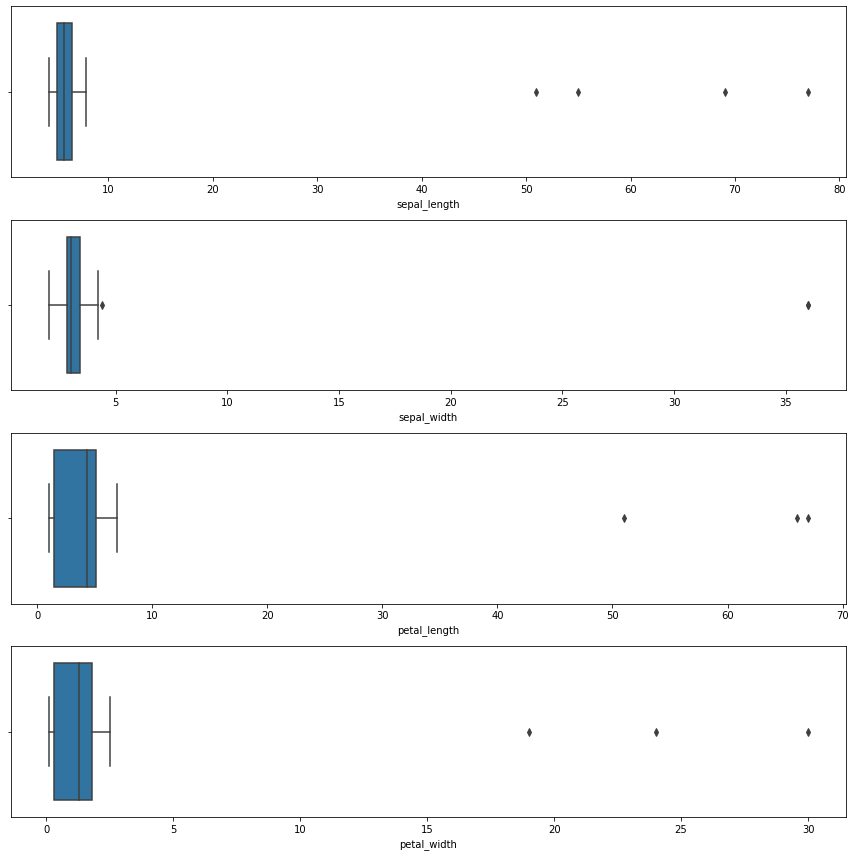

In [63]:
#presents the outliers with the diamonds shown below
fig,axes = plt.subplots(4,1,figsize=(12,12))
count = 0
for column in data.columns:
  if isinstance(data[column][0],float)==1:
    sns.boxplot(x = data[column],ax=axes[count])
    count = count + 1

plt.tight_layout()

In [82]:
threshold1_upper = s_df.mean()+2*s_df.std()
threshold1_lower = s_df.mean()-2*s_df.std()
print(threshold1_upper,threshold1_lower)
#temp_acc_std = s_df[(s_df < threshold1_upper) & (s_df > threshold1_lower)]
#temp_acc_std.shape

threshold2_upper = sw_df.mean()+2*sw_df.std()
threshold2_lower = sw_df.mean()-2*sw_df.std()
print(threshold2_upper,threshold2_lower)
#temp_acc_std1 = sw_df[(sw_df < threshold2_upper) & (sw_df > threshold2_lower)]
#temp_acc_std1.shape

threshold3_upper = p_df.mean()+2*p_df.std()
threshold3_lower = p_df.mean()-2*p_df.std()
print(threshold3_upper,threshold3_lower)
#temp_acc_std2 = p_df[(p_df < threshold3_upper) & (p_df > threshold3_lower)]
#temp_acc_std2.shape


threshold4_upper = pw_df.mean()+2*pw_df.std()
threshold4_lower = pw_df.mean()-2*pw_df.std()
print(threshold4_upper,threshold4_lower)
#temp_acc_std3 = p_df[(p_df < threshold4_upper) & (p_df > threshold4_lower)]
#temp_acc_std3.shape


(0.9, 1.8]     0.000000
(1.8, 2.7]     0.000000
(2.7, 77.0]    1.403043
dtype: float64 (0.9, 1.8]     0.000000
(1.8, 2.7]     0.000000
(2.7, 77.0]    0.486612
dtype: float64
(2.9, 3.2]     1.200004
(3.2, 36.0]    1.238822
dtype: float64 (2.9, 3.2]    -0.620694
(3.2, 36.0]   -0.618132
dtype: float64
(1.7, 4.9]     1.22613
(4.9, 67.0]    1.22613
dtype: float64 (1.7, 4.9]    -0.619233
(4.9, 67.0]   -0.619233
dtype: float64
(0.433, 1.6]    1.275468
(1.6, 30.0]     1.263486
dtype: float64 (0.433, 1.6]   -0.613399
(1.6, 30.0]    -0.615211
dtype: float64


**Block #10: Decribing the final dataset**

In [83]:
#145 count is an indicition that this is the correct final dataset as that was the count limit after getting rid of all duplicates and NaNs
final_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,"(0.9, 1.8]","(1.8, 2.7]","(2.7, 77.0]","(2.9, 3.2]","(3.2, 36.0]","(1.7, 4.9]","(4.9, 67.0]","(0.433, 1.6]","(1.6, 30.0]",japan,usa,versicolor,virginica
count,145.000000,145.000000,145.000000,145.000000,145.0,145.0,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,7.419310,3.528966,4.881379,1.651724,0.0,0.0,0.944828,0.289655,0.310345,0.303448,0.303448,0.331034,0.324138,0.310345,0.351724,0.296552,0.337931
std,9.588175,3.877892,8.481024,3.457281,0.0,0.0,0.229108,0.455175,0.464238,0.461341,0.461341,0.472217,0.469674,0.464238,0.479164,0.458320,0.474644
min,4.300000,2.000000,1.000000,0.100000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,36.000000,67.000000,30.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Block #10: There is no missing data**

In [84]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  145 non-null    float64
 1   sepal_width   145 non-null    float64
 2   petal_length  145 non-null    float64
 3   petal_width   145 non-null    float64
 4   species       145 non-null    object 
 5   origin        145 non-null    object 
 6   (0.9, 1.8]    145 non-null    uint8  
 7   (1.8, 2.7]    145 non-null    uint8  
 8   (2.7, 77.0]   145 non-null    uint8  
 9   (2.9, 3.2]    145 non-null    uint8  
 10  (3.2, 36.0]   145 non-null    uint8  
 11  (1.7, 4.9]    145 non-null    uint8  
 12  (4.9, 67.0]   145 non-null    uint8  
 13  (0.433, 1.6]  145 non-null    uint8  
 14  (1.6, 30.0]   145 non-null    uint8  
 15  japan         145 non-null    uint8  
 16  usa           145 non-null    uint8  
 17  versicolor    145 non-null    uint8  
 18  virginica     145 non-null    

In [85]:
final_data.to_csv('fixed_iris.csv')